In [18]:
import cirq
import numpy as np

In [19]:
from cirq.aqt.aqt_device import get_aqt_device
from cirq.aqt.aqt_sampler import AQTSampler
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from cirq.ops import CZ, H, X, CX

In [20]:
access_token = '2633b2d14dae4d9da7c9df2503857334'

In [29]:
device, qubits = get_aqt_device(2)
print(device)

0───1


In [34]:
#circuit = cirq.Circuit(device=device)
#circuit.append([cirq.H(qubits[1])])
#circuit.append([cirq.CNOT(qubits[1], qubits[0])])
#device.validate_circuit(circuit)
#print(circuit, qubits)
from cirq.ops import CZ, H, X, CX
qubits = get_aqt_device(2)
cirq.Circuit(H(qubits(0)), H(qubits(1)))
circuit = cirq.Circuit(device=device)
circuit.append()
print(circuit)

TypeError: 'tuple' object is not callable

In [25]:
url = 'https://gateway.aqt.eu/marmot/sim/'
aqt_sampler = AQTSampler(url, access_token=access_token)
aqt_sweep = aqt_sampler.run(circuit, repetitions=40)

AssertionError: 

In [11]:
print(aqt_sweep)
a = getattr(aqt_sweep, 'measurements')
#print(a)
b = a["m"]+0
a["m"]=b
print(a)
print(b.tolist().count([0,1]))

m=0100110001111100011100001001101110111011, 0100110001111100011100001001101110111011
{'m': array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1]])}
0


Counter({(0,): 21, (2,): 19})


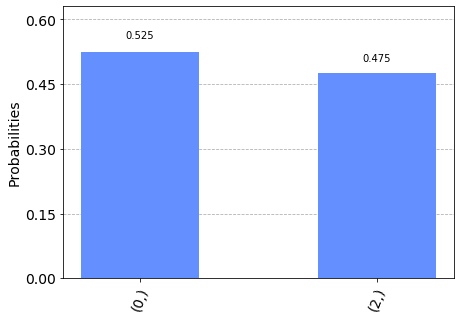

In [8]:
#cirq.plot_state_histogram(aqt_sweep)
counts = cirq.TrialResult.multi_measurement_histogram(aqt_sweep,keys=['m'])
print(counts)
plot_histogram(counts)